In [ ]:
import os
import shutil
from glob import glob

# Source directory where all images are stored
source_dir = "dataset/portrait-personality-3"
output_dir = "grouped_personality-3"

os.makedirs(output_dir, exist_ok=True)

# Get all jpg files
image_paths = glob(os.path.join(source_dir, "*.jpg"))

for img_path in image_paths:
    filename = os.path.basename(img_path)
    
    # Extract the video ID: everything before '.mp4-'
    if ".mp4-" in filename:
        video_id = filename.split(".mp4-")[0]
    else:
        continue  # Skip if doesn't follow pattern

    # Create a folder for this video ID if not exists
    video_folder = os.path.join(output_dir, video_id)
    os.makedirs(video_folder, exist_ok=True)

    # Destination path
    dest_path = os.path.join(video_folder, filename)
    shutil.copy2(img_path, dest_path)  # use shutil.move if you want to move

print("Images grouped into folders based on video ID.")


In [1]:
import os
import shutil
import random

source_dir = 'prepared_dataset'
output_base = 'split_dataset'
train_ratio, val_ratio, test_ratio = 0.6, 0.2, 0.2

# Ensure reproducibility
random.seed(42)

# Create output folders
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

# Get all class folders
all_classes = [f for f in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, f))]
random.shuffle(all_classes)

# Split folders
n_total = len(all_classes)
n_train = int(n_total * train_ratio)
n_val = int(n_total * val_ratio)

train_classes = all_classes[:n_train]
val_classes = all_classes[n_train:n_train + n_val]
test_classes = all_classes[n_train + n_val:]

# Function to copy folders
def copy_class_folders(class_list, split_name):
    for class_name in class_list:
        src = os.path.join(source_dir, class_name)
        dst = os.path.join(output_base, split_name, class_name)
        shutil.copytree(src, dst)

# Copy each split
copy_class_folders(train_classes, 'train')
copy_class_folders(val_classes, 'val')
copy_class_folders(test_classes, 'test')

print("Split complete!")


Split complete!


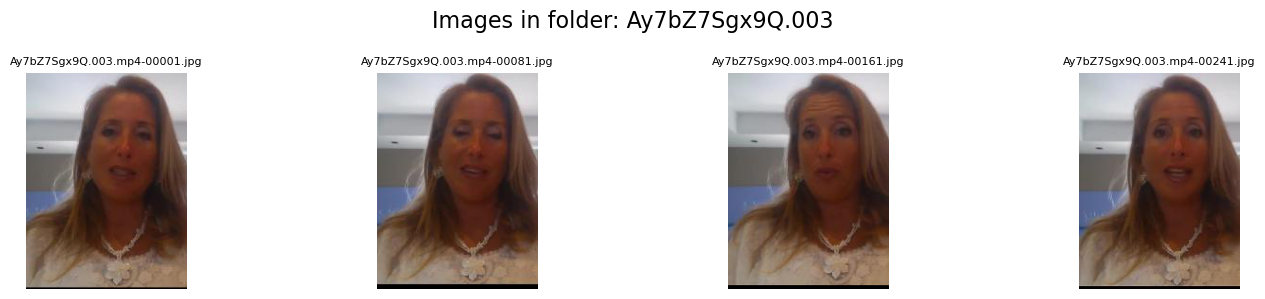

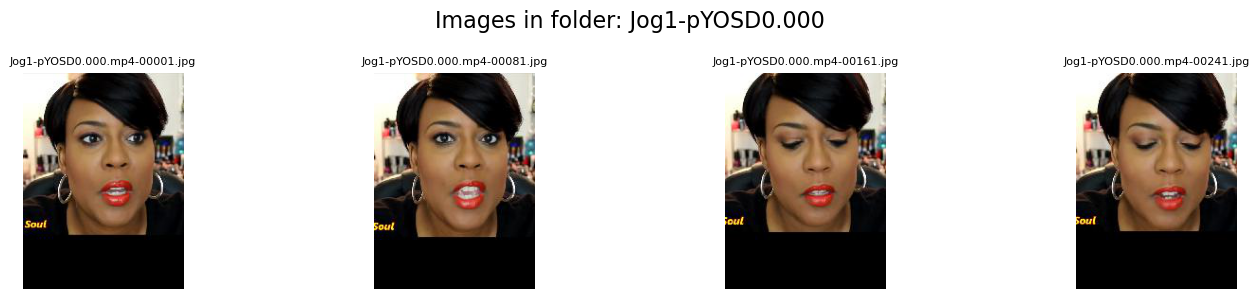

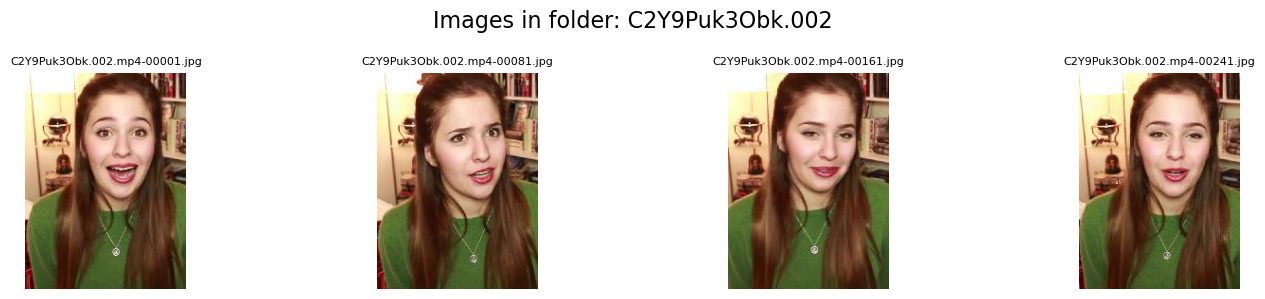

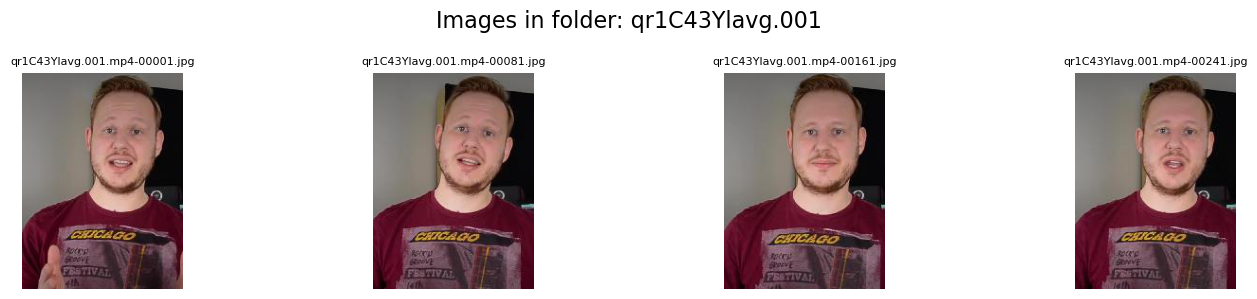

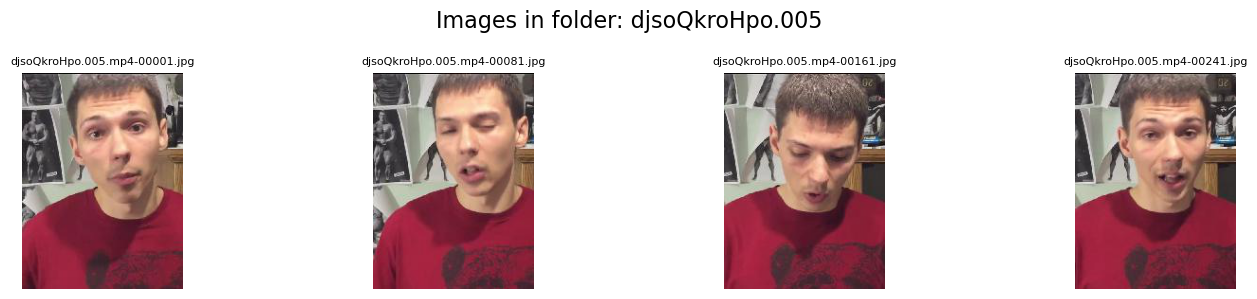

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your 'prepared_dataset' folder
base_path = 'split_dataset/train'

# Get all subfolder names
all_folders = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

# Select 5 random folders (or first 5 if you want)
# selected_folders = all_folders[:5]  # <-- First 5
selected_folders = random.sample(all_folders, 5)  # <-- Random 5 if you prefer

for folder_name in selected_folders:
    folder_path = os.path.join(base_path, folder_name)
    images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if images:
        n_images = len(images)
        n_cols = min(5, n_images)  # Max 5 images per row
        n_rows = (n_images + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
        axes = axes.flatten() if n_images > 1 else [axes]
        
        for idx, image_name in enumerate(images):
            img_path = os.path.join(folder_path, image_name)
            img = mpimg.imread(img_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(image_name, fontsize=8)
        
        # Hide unused subplots
        for idx in range(n_images, len(axes)):
            axes[idx].axis('off')
            
        plt.suptitle(f'Images in folder: {folder_name}', fontsize=16)
        plt.tight_layout()
        plt.show()


In [ ]:
# !pip install torch torchvision xgboost
# !pip install tqdm

In [6]:
import pandas as pd

# Load the CSV
df = pd.read_csv('dataset/bigfive_labels.csv')  # replace with your actual file name

# Show basic info about the CSV
print(df.info())

# Show the first few rows of data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VideoName               8000 non-null   object 
 1   ValueExtraversion       8000 non-null   float64
 2   ValueAgreeableness      8000 non-null   float64
 3   ValueConscientiousness  8000 non-null   float64
 4   ValueNeurotisicm        8000 non-null   float64
 5   ValueOpenness           8000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 375.1+ KB
None


,VideoName,ValueExtraversion,ValueAgreeableness,ValueConscientiousness,ValueNeurotisicm,ValueOpenness
0,GQczMGrVgbc.001.mp4,0.570093,0.703297,0.640777,0.666667,0.544444
1,-utrsarZeIY.004.mp4,0.523364,0.516484,0.436893,0.333333,0.411111
2,3HA2W1s4oP8.001.mp4,0.401869,0.538462,0.427184,0.510417,0.388889
3,hM96SfN5_F4.004.mp4,0.485981,0.637363,0.359223,0.458333,0.566667
4,SgzOYog1pH4.003.mp4,0.532710,0.527473,0.650485,0.458333,0.477778


In [7]:
df.columns

Index(['VideoName', 'ValueExtraversion', 'ValueAgreeableness',
       'ValueConscientiousness', 'ValueNeurotisicm', 'ValueOpenness'],
      dtype='object')

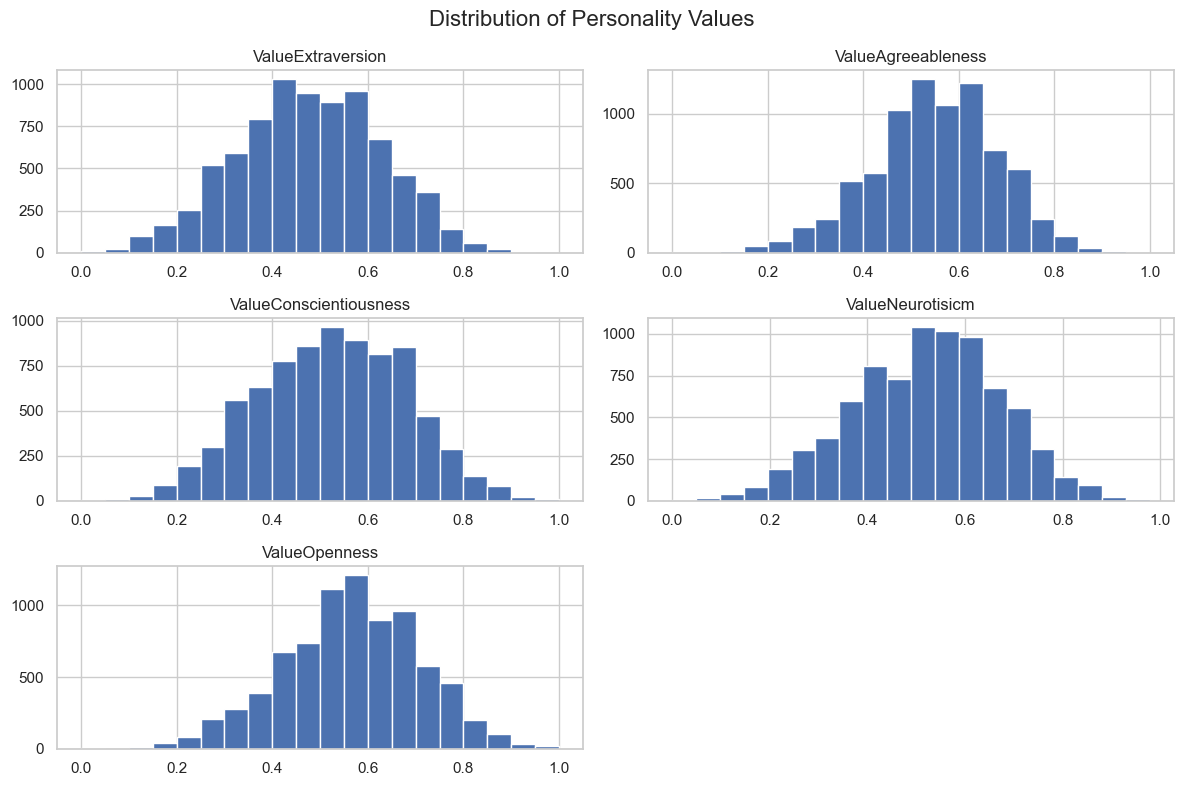

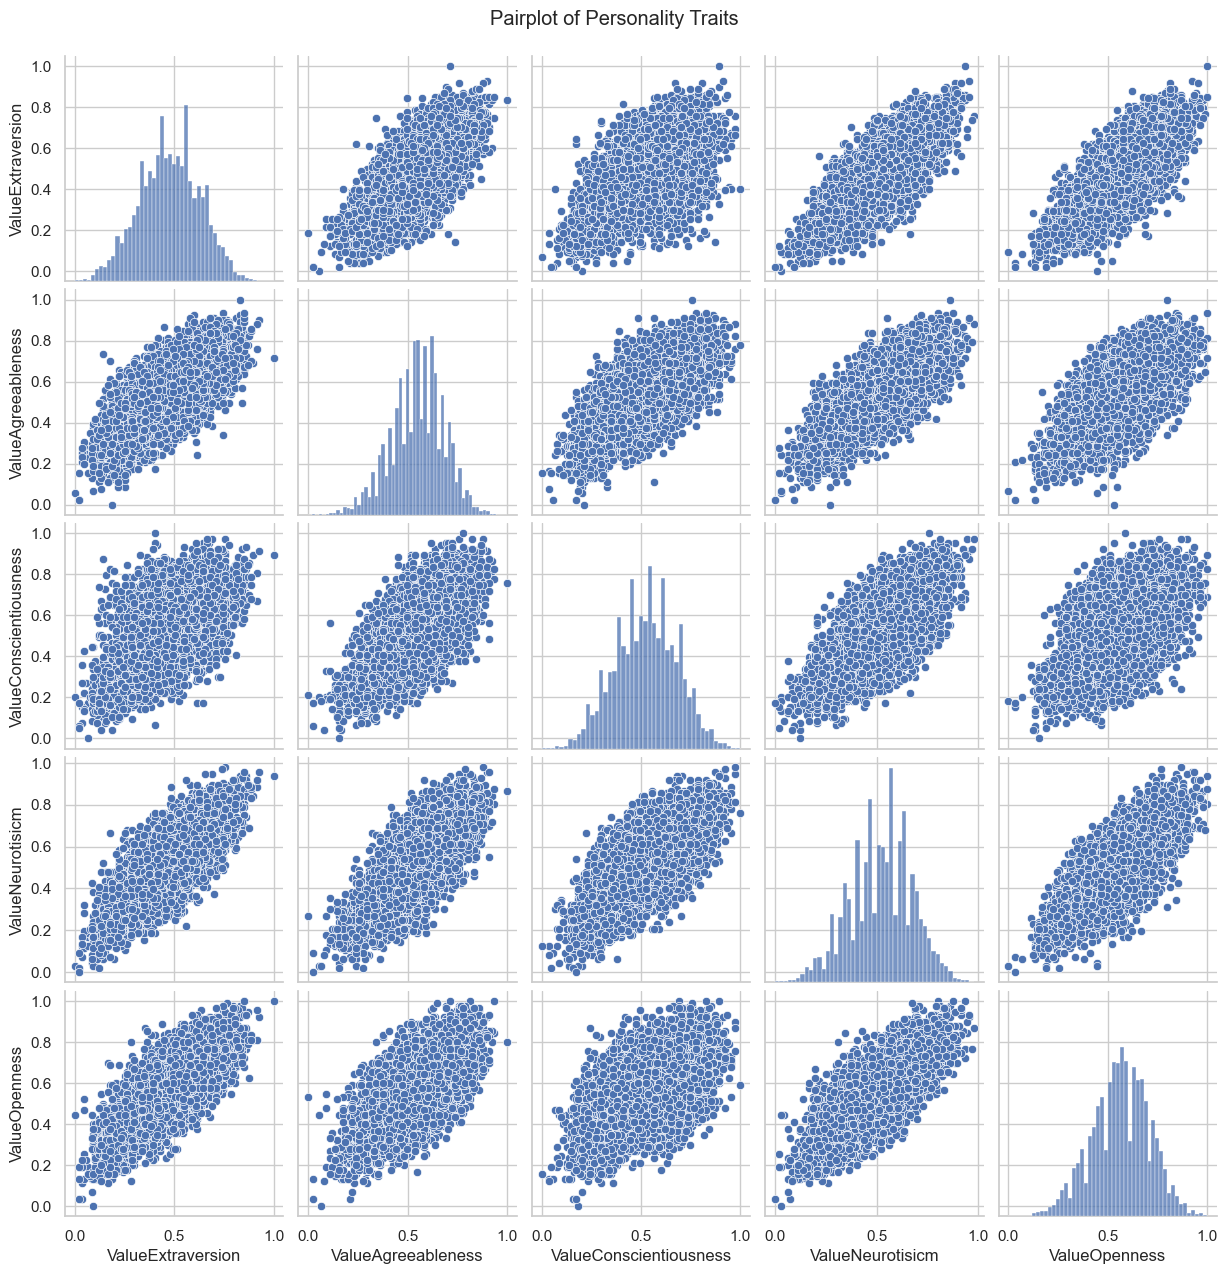

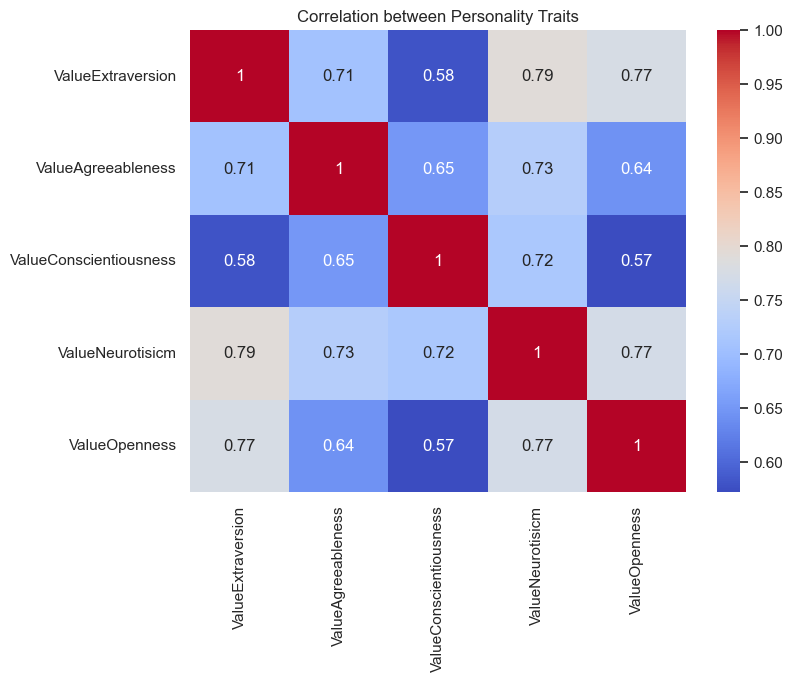

In [8]:
import seaborn as sns
# Drop 'VideoName' because it's not numeric
numeric_df = df.drop(columns=['VideoName'])

# Set the style
sns.set(style="whitegrid")

# Plot histograms for each numeric column
numeric_df.hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Personality Values', fontsize=16)
plt.tight_layout()
plt.show()

# Plot pairplot to see relationships between features
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Personality Traits', y=1.02)
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Personality Traits')
plt.show()

In [1]:
import os
import torch
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from torchvision import models, transforms

# === Setup ===
csv_path = "dataset/bigfive_labels.csv"
split_base = "split_dataset"  # This should contain train/, val/, test/
splits = ['train', 'val', 'test']

# Load label CSV
df = pd.read_csv(csv_path)
df["VideoID"] = df["VideoName"].str.replace(".mp4", "", regex=False)

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load ResNet50 without final classification layer
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval().cuda()

# === Feature extraction function ===
def extract_features_from_folder(folder_path):
    features = []
    for img_name in os.listdir(folder_path):
        if not img_name.lower().endswith(".jpg"):
            continue
        img_path = os.path.join(folder_path, img_name)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).cuda()
        with torch.no_grad():
            feature = resnet(image).squeeze().cpu().numpy()
        features.append(feature)
    if len(features) == 0:
        return None
    return np.mean(features, axis=0)

# === Loop over splits ===
all_data = {}

for split in splits:
    print(f"\nProcessing split: {split}")
    split_path = os.path.join(split_base, split)
    
    X_split = []
    y_split = []
    failed = []

    for folder in tqdm(os.listdir(split_path)):
        folder_path = os.path.join(split_path, folder)
        if not os.path.isdir(folder_path):
            continue

        features = extract_features_from_folder(folder_path)
        if features is None:
            failed.append(folder)
            continue

        row = df[df["VideoID"] == folder]
        if row.empty:
            failed.append(folder)
            continue

        labels = row.iloc[0, 1:6].values.astype(np.float32)  # assuming cols 1–5 are labels
        X_split.append(features)
        y_split.append(labels)

    all_data[f'X_{split}'] = np.array(X_split)
    all_data[f'y_{split}'] = np.array(y_split)

    print(f"{split.upper()} — X: {len(X_split)}, y: {len(y_split)}, Failed: {len(failed)}")

# Example: Access your splits
X_train = all_data['X_train']
y_train = all_data['y_train']
X_val   = all_data['X_val']
y_val   = all_data['y_val']
X_test  = all_data['X_test']
y_test  = all_data['y_test']

os.makedirs("extracted_features", exist_ok=True)
# Save arrays to extracted_features/ folder
for key, array in all_data.items():
    save_path = os.path.join("extracted_features", f"{key}.npy")
    np.save(save_path, array)
    print(f"Saved {key} to {save_path}")



c:\Users\muham\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\muham\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Processing split: train


100%|██████████| 4798/4798 [02:17<00:00, 34.85it/s]


TRAIN — X: 4798, y: 4798, Failed: 0

Processing split: val


100%|██████████| 1599/1599 [00:44<00:00, 36.18it/s]


VAL — X: 1599, y: 1599, Failed: 0

Processing split: test


100%|██████████| 1600/1600 [00:45<00:00, 35.20it/s]


TEST — X: 1600, y: 1600, Failed: 0
Saved X_train to extracted_features\X_train.npy
Saved y_train to extracted_features\y_train.npy
Saved X_val to extracted_features\X_val.npy
Saved y_val to extracted_features\y_val.npy
Saved X_test to extracted_features\X_test.npy
Saved y_test to extracted_features\y_test.npy


In [2]:
import numpy as np
# Load features and labels
X = np.load("extracted_features/X_train.npy")
y = np.load("extracted_features/y_train.npy")

In [3]:
import random

# Pick 5 random indices
sample_indices = random.sample(range(len(X)), 5)

# Print samples
for idx in sample_indices:
    print(f"Sample {idx}:")
    print(f"Feature (X): {X[idx]}")
    print(f"Label (y): {y[idx]}")
    print("-" * 50)


Sample 3673:
Feature (X): [0.04109908 0.5714216  0.2738182  ... 0.26310858 0.06635284 0.07080474]
Label (y): [0.24299066 0.42857143 0.42718446 0.40625    0.4       ]
--------------------------------------------------
Sample 3081:
Feature (X): [0.09700933 1.5144801  0.30372655 ... 0.15730056 0.22088942 0.0495955 ]
Label (y): [0.44859812 0.48351648 0.5631068  0.5625     0.5       ]
--------------------------------------------------
Sample 3128:
Feature (X): [0.30404192 0.9188083  0.95742166 ... 0.1189855  0.16568726 0.14326708]
Label (y): [0.53271025 0.5714286  0.6893204  0.5729167  0.6888889 ]
--------------------------------------------------
Sample 1415:
Feature (X): [0.10947673 0.4815184  1.2536874  ... 0.12417361 0.43483967 0.08553252]
Label (y): [0.69158876 0.61538464 0.52427185 0.6354167  0.56666666]
--------------------------------------------------
Sample 413:
Feature (X): [0.32584816 1.3727865  1.1040809  ... 0.34856507 0.5343454  0.4528679 ]
Label (y): [0.5046729  0.6593407  0

In [4]:
X.shape, y.shape

((4798, 2048), (4798, 5))

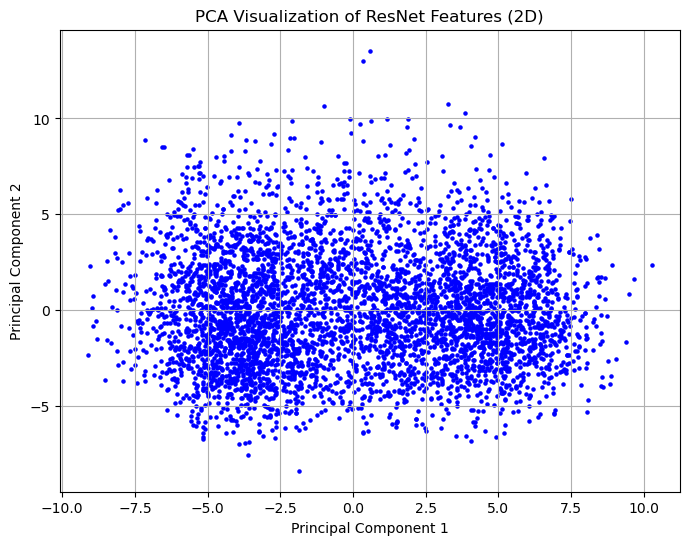

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 components just for visualization
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c='blue', s=5)  # you can also color by y if classification
plt.title('PCA Visualization of ResNet Features (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import os

# === Load saved features ===
base_path = "extracted_features"
X_train = np.load(os.path.join(base_path, "X_train.npy"))
y_train = np.load(os.path.join(base_path, "y_train.npy"))
X_val   = np.load(os.path.join(base_path, "X_val.npy"))
y_val   = np.load(os.path.join(base_path, "y_val.npy"))
X_test  = np.load(os.path.join(base_path, "X_test.npy"))
y_test  = np.load(os.path.join(base_path, "y_test.npy"))

# === Apply PCA ===
pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train)
X_val_pca   = pca.transform(X_val)
X_test_pca  = pca.transform(X_test)


🚀 Training RandomForest

📊 RandomForest - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.136131  0.106759  0.233064            0.233511   0.466355   
Trait 2  0.126954  0.106759  0.172853            0.173199   0.490330   
Trait 3  0.132047  0.106759  0.279250            0.280021   0.451553   
Trait 4  0.138874  0.106759  0.214137            0.214842   0.468750   
Trait 5  0.134578  0.106759  0.209836            0.210216   0.540000   
Average  0.133717  0.106759  0.221828            0.222358   0.483398   

         Median AE  
Trait 1   0.092617  
Trait 2   0.086264  
Trait 3   0.089806  
Trait 4   0.095417  
Trait 5   0.086556  
Average   0.090132  


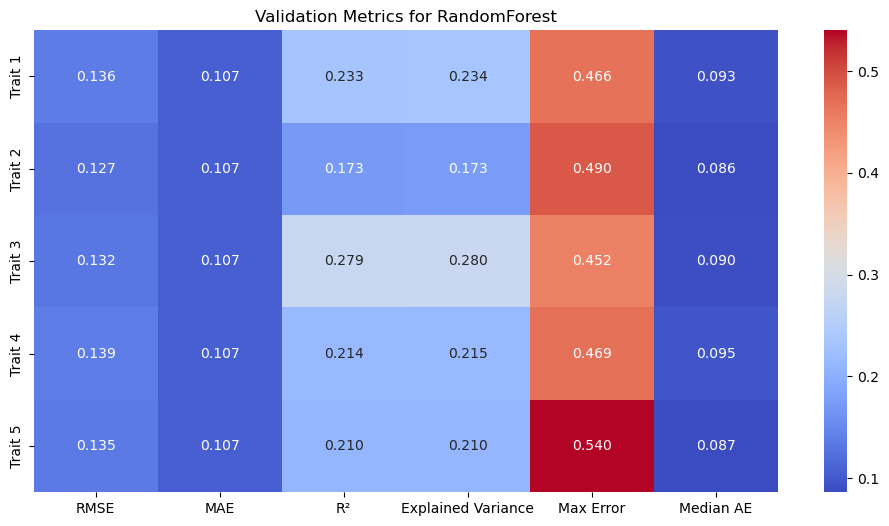


📊 RandomForest - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.130708  0.104049  0.235186            0.235371   0.392430   
Trait 2  0.120496  0.104049  0.162855            0.162899   0.383516   
Trait 3  0.134424  0.104049  0.274914            0.276539   0.456019   
Trait 4  0.134231  0.104049  0.204334            0.204388   0.460312   
Trait 5  0.130876  0.104049  0.197105            0.198931   0.436778   
Average  0.130147  0.104049  0.214879            0.215626   0.425811   

         Median AE  
Trait 1   0.092336  
Trait 2   0.079451  
Trait 3   0.092427  
Trait 4   0.090260  
Trait 5   0.086444  
Average   0.088184  


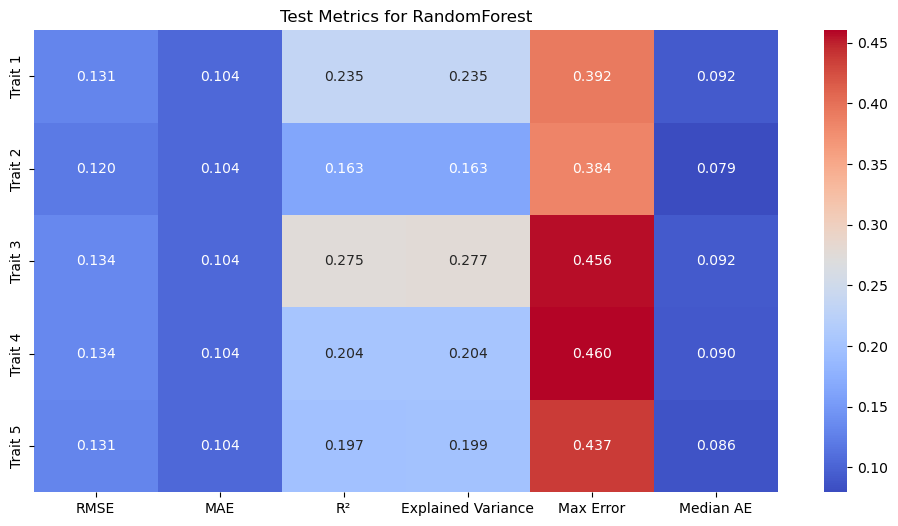


🚀 Training GradientBoosting

📊 GradientBoosting - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.138967  0.108197  0.200782            0.201160   0.470459   
Trait 2  0.129216  0.108197  0.143118            0.143545   0.461626   
Trait 3  0.131565  0.108197  0.284498            0.285095   0.429480   
Trait 4  0.140301  0.108197  0.197910            0.198478   0.442204   
Trait 5  0.134513  0.108197  0.210600            0.211047   0.508862   
Average  0.134912  0.108197  0.207382            0.207865   0.462526   

         Median AE  
Trait 1   0.093081  
Trait 2   0.087542  
Trait 3   0.090776  
Trait 4   0.097277  
Trait 5   0.089898  
Average   0.091715  


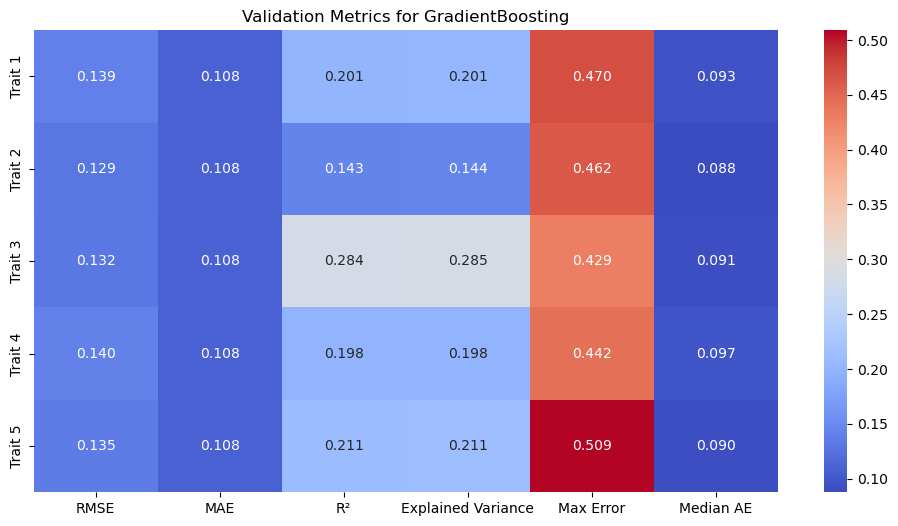


📊 GradientBoosting - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.135747  0.106831  0.175075            0.175157   0.442885   
Trait 2  0.124609  0.106831  0.104742            0.104820   0.421067   
Trait 3  0.133727  0.106831  0.282417            0.283202   0.452398   
Trait 4  0.138615  0.106831  0.151516            0.151562   0.400811   
Trait 5  0.132209  0.106831  0.180659            0.183863   0.461822   
Average  0.132981  0.106831  0.178882            0.179721   0.435797   

         Median AE  
Trait 1   0.096179  
Trait 2   0.083616  
Trait 3   0.093166  
Trait 4   0.096249  
Trait 5   0.089983  
Average   0.091839  


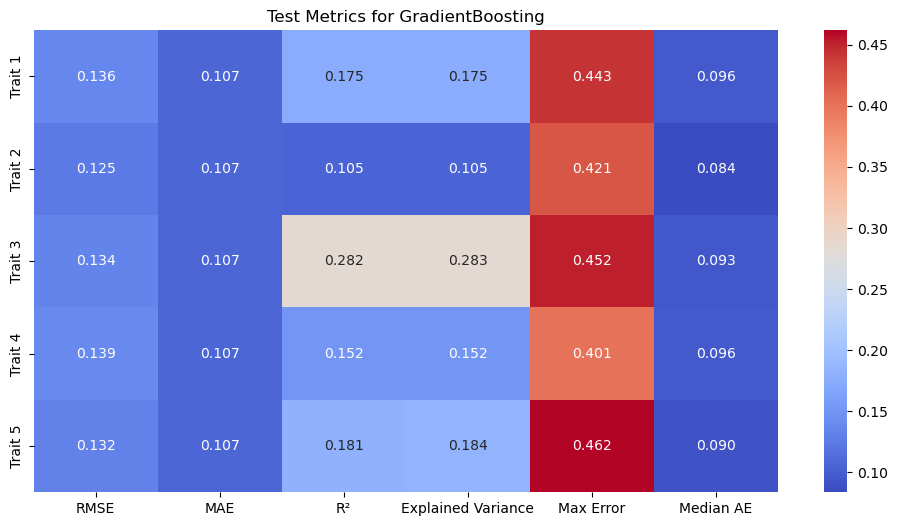


🚀 Training Ridge

📊 Ridge - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.135346  0.105747  0.241880            0.241908   0.461275   
Trait 2  0.129778  0.105747  0.135648            0.135864   0.558123   
Trait 3  0.125603  0.105747  0.347879            0.348084   0.457990   
Trait 4  0.139342  0.105747  0.208831            0.209398   0.424271   
Trait 5  0.131765  0.105747  0.242528            0.242812   0.433980   
Average  0.132367  0.105747  0.235353            0.235613   0.467128   

         Median AE  
Trait 1   0.086556  
Trait 2   0.088107  
Trait 3   0.083692  
Trait 4   0.097061  
Trait 5   0.093127  
Average   0.089708  


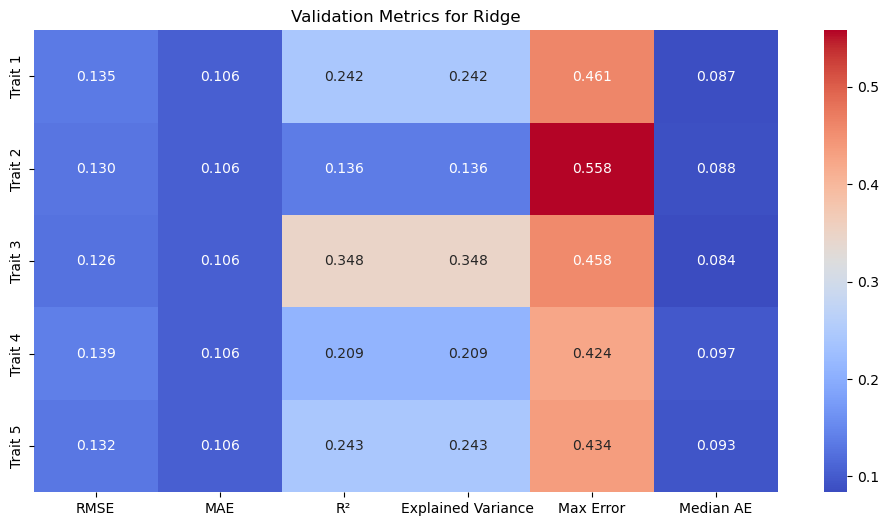


📊 Ridge - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.135557  0.105768  0.177387            0.177438   0.468813   
Trait 2  0.124221  0.105768  0.110304            0.110378   0.406944   
Trait 3  0.130956  0.105768  0.311843            0.312399   0.392728   
Trait 4  0.137333  0.105768  0.167146            0.167199   0.457929   
Trait 5  0.132536  0.105768  0.176608            0.179044   0.545090   
Average  0.132120  0.105768  0.188657            0.189292   0.454301   

         Median AE  
Trait 1   0.094181  
Trait 2   0.080944  
Trait 3   0.091162  
Trait 4   0.096213  
Trait 5   0.091767  
Average   0.090853  


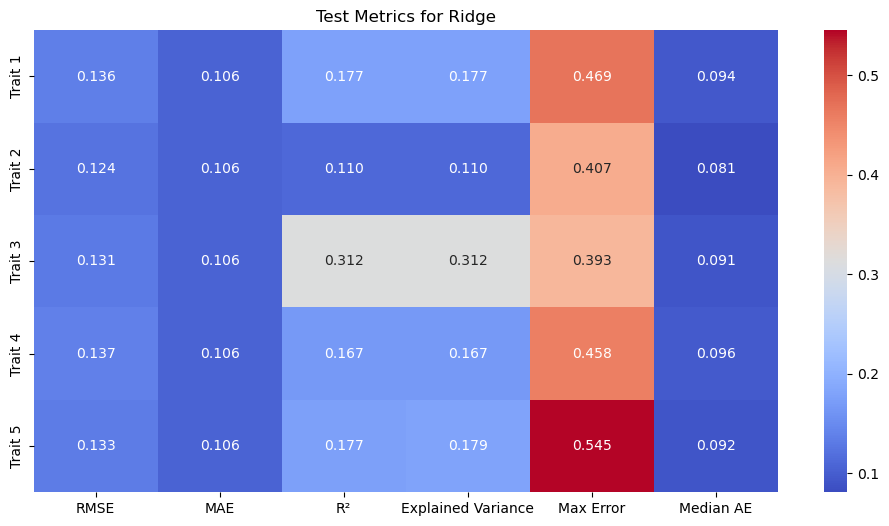


🚀 Training SVR

📊 SVR - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.127893  0.098515  0.323077            0.323215   0.465899   
Trait 2  0.121644  0.098515  0.240608            0.241091   0.524612   
Trait 3  0.116147  0.098515  0.442377            0.442394   0.385507   
Trait 4  0.130202  0.098515  0.309222            0.309222   0.435678   
Trait 5  0.123639  0.098515  0.333070            0.333119   0.439429   
Average  0.123905  0.098515  0.329671            0.329808   0.450225   

         Median AE  
Trait 1   0.083921  
Trait 2   0.081326  
Trait 3   0.078436  
Trait 4   0.088513  
Trait 5   0.083476  
Average   0.083134  


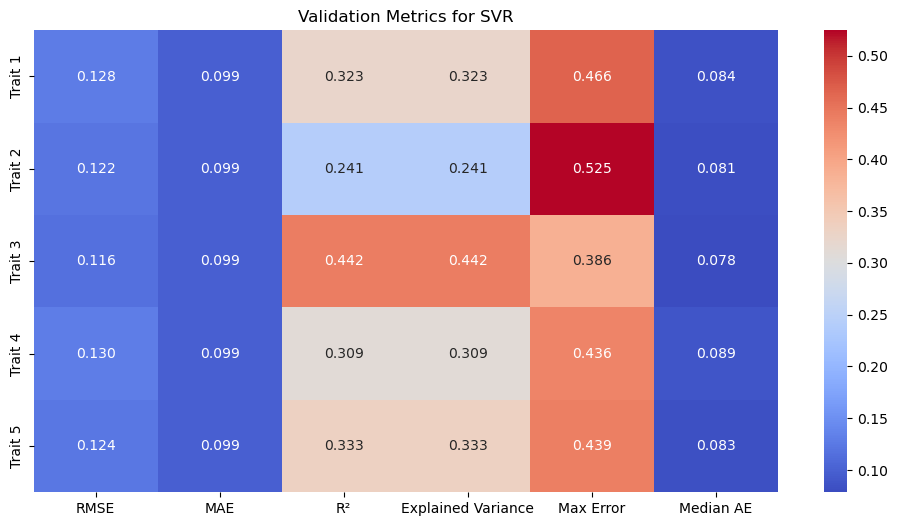


📊 SVR - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.123780  0.097735  0.314109            0.314300   0.393744   
Trait 2  0.115769  0.097735  0.227248            0.227439   0.369861   
Trait 3  0.120578  0.097735  0.416597            0.416948   0.417588   
Trait 4  0.126551  0.097735  0.292778            0.293051   0.406774   
Trait 5  0.124365  0.097735  0.275004            0.276938   0.433633   
Average  0.122209  0.097735  0.305147            0.305735   0.404320   

         Median AE  
Trait 1   0.083320  
Trait 2   0.077125  
Trait 3   0.082839  
Trait 4   0.085319  
Trait 5   0.083226  
Average   0.082366  


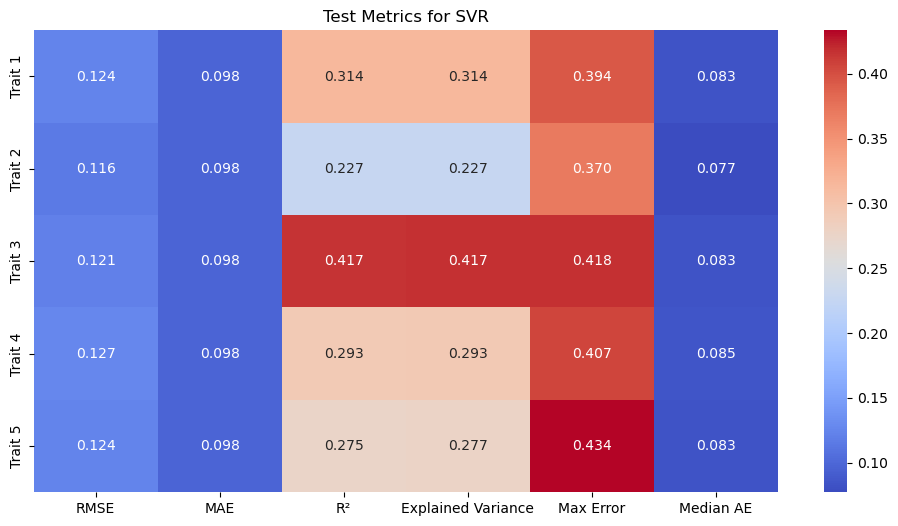


🚀 Training XGBoost

📊 XGBoost - Validation Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.138686  0.107493  0.204011            0.204247   0.479305   
Trait 2  0.130971  0.107493  0.119693            0.120483   0.501347   
Trait 3  0.129994  0.107493  0.301488            0.302954   0.421808   
Trait 4  0.139625  0.107493  0.205618            0.206159   0.458674   
Trait 5  0.135897  0.107493  0.194279            0.194375   0.473349   
Average  0.135034  0.107493  0.205018            0.205644   0.466897   

         Median AE  
Trait 1   0.095025  
Trait 2   0.087857  
Trait 3   0.083424  
Trait 4   0.097209  
Trait 5   0.090644  
Average   0.090832  


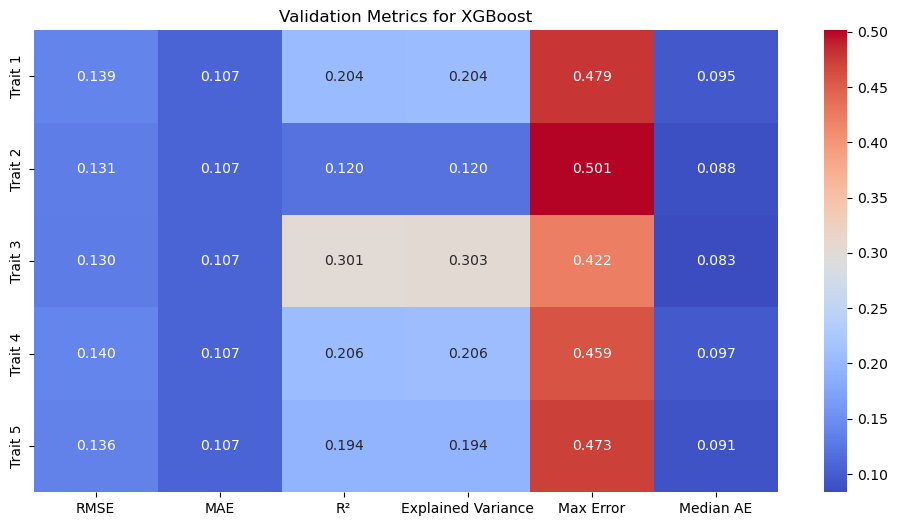


📊 XGBoost - Test Evaluation
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.132877  0.105715  0.209591            0.209862   0.554709   
Trait 2  0.125677  0.105715  0.089324            0.089456   0.459347   
Trait 3  0.130966  0.105715  0.311744            0.314207   0.449061   
Trait 4  0.138279  0.105715  0.155623            0.155632   0.433388   
Trait 5  0.133312  0.105715  0.166933            0.168909   0.497571   
Average  0.132222  0.105715  0.186643            0.187613   0.478815   

         Median AE  
Trait 1   0.087742  
Trait 2   0.083300  
Trait 3   0.090690  
Trait 4   0.094083  
Trait 5   0.092276  
Average   0.089618  


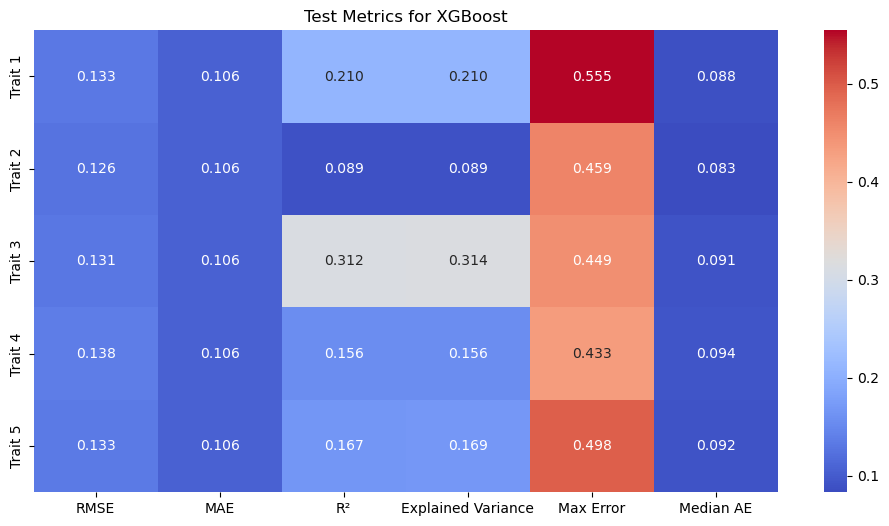

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, max_error, median_absolute_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
import warnings
warnings.filterwarnings("ignore")


# === Define models ===
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42)),
    "Ridge": Ridge(alpha=1.0),
    "SVR": MultiOutputRegressor(SVR()),
    "XGBoost": MultiOutputRegressor(XGBRegressor(n_estimators=100, tree_method="hist", enable_categorical=False, random_state=42))
}

# === Evaluation function ===
def evaluate_model(name, model, X_data, y_data, label):
    preds = model.predict(X_data)
    rmse = np.sqrt(mean_squared_error(y_data, preds, multioutput='raw_values'))
    mae = mean_absolute_error(y_data, preds)
    r2 = r2_score(y_data, preds, multioutput='raw_values')
    expl_var = explained_variance_score(y_data, preds, multioutput='raw_values')
    max_err = [max_error(y_data[:, i], preds[:, i]) for i in range(y_data.shape[1])]
    med_ae = [median_absolute_error(y_data[:, i], preds[:, i]) for i in range(y_data.shape[1])]

    metrics_dict = {
        "RMSE": rmse,
        "MAE": [mae] * len(rmse),
        "R²": r2,
        "Explained Variance": expl_var,
        "Max Error": max_err,
        "Median AE": med_ae,
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[f"Trait {i+1}" for i in range(len(rmse))])
    averages = {k: np.mean(v) if isinstance(v, (list, np.ndarray)) else v for k, v in metrics_dict.items()}
    metrics_df.loc["Average"] = averages

    print(f"\n📊 {name} - {label} Evaluation")
    print(metrics_df)

    plt.figure(figsize=(12, 6))
    sns.heatmap(metrics_df.iloc[:-1].astype(float), annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"{label} Metrics for {name}")
    plt.show()

# === Train and evaluate all models ===
for name, model in models.items():
    print(f"\n🚀 Training {name}")
    model.fit(X_train_pca, y_train)
    
    evaluate_model(name, model, X_val_pca, y_val, "Validation")
    evaluate_model(name, model, X_test_pca, y_test, "Test")


In [9]:
oof_train_preds = []
val_preds = []
test_preds = []

for name, model in models.items():
    print(f"Training {name}")

    # Train on PCA-reduced training data
    model.fit(X_train_pca, y_train)

    # Predict on training, validation, and test
    train_pred = model.predict(X_train_pca)  # used for stacking input
    val_pred   = model.predict(X_val_pca)    # validation set
    test_pred  = model.predict(X_test_pca)   # final test set

    # Append predictions
    oof_train_preds.append(train_pred)
    val_preds.append(val_pred)
    test_preds.append(test_pred)

# Stack horizontally to prepare for second-level model
stacked_train = np.hstack(oof_train_preds)  # shape: (N_train, M*traits)
stacked_val   = np.hstack(val_preds)
stacked_test  = np.hstack(test_preds)

print("Stacked train shape:", stacked_train.shape)
print("Stacked val shape:", stacked_val.shape)
print("Stacked test shape:", stacked_test.shape)


Training RandomForest
Training GradientBoosting
Training Ridge
Training SVR
Training XGBoost
Stacked train shape: (4798, 25)
Stacked val shape: (1599, 25)
Stacked test shape: (1600, 25)



=== Deep Super Learner Meta-Model Metrics (Validation) ===
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.132436  0.102786  0.274131            0.274262   0.478645   
Trait 2  0.124678  0.102786  0.202252            0.202865   0.490385   
Trait 3  0.124905  0.102786  0.355106            0.356298   0.420534   
Trait 4  0.133407  0.102786  0.274797            0.275313   0.427917   
Trait 5  0.130151  0.102786  0.260970            0.260974   0.461667   
Average  0.129115  0.102786  0.273451            0.273942   0.455829   

         Median AE  
Trait 1   0.089019  
Trait 2   0.085110  
Trait 3   0.081359  
Trait 4   0.091927  
Trait 5   0.087111  
Average   0.086905  


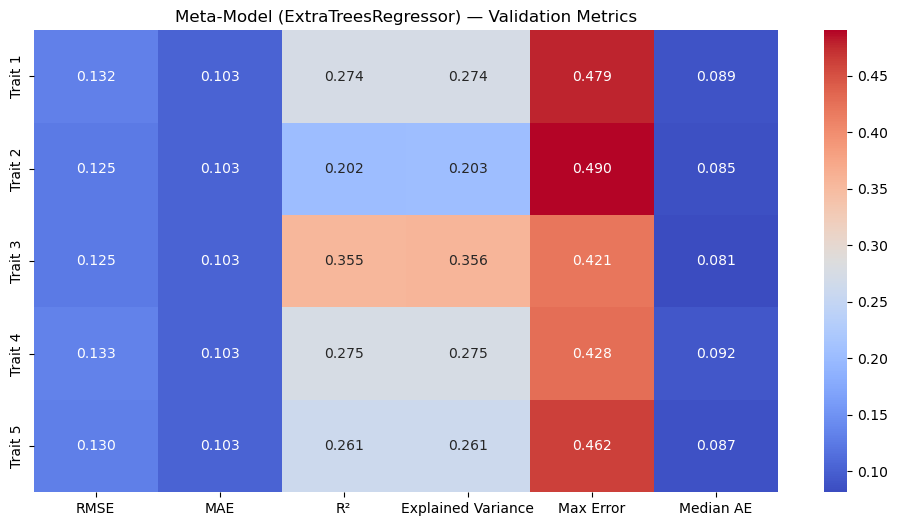


=== Deep Super Learner Meta-Model Metrics (Test) ===
             RMSE       MAE        R²  Explained Variance  Max Error  \
Trait 1  0.127604  0.100948  0.271069            0.271238   0.464766   
Trait 2  0.118753  0.100948  0.186897            0.187064   0.422473   
Trait 3  0.126885  0.100948  0.353973            0.356190   0.428883   
Trait 4  0.130465  0.100948  0.248356            0.248382   0.437448   
Trait 5  0.127183  0.100948  0.241774            0.242961   0.476722   
Average  0.126178  0.100948  0.260414            0.261167   0.446059   

         Median AE  
Trait 1   0.087103  
Trait 2   0.077445  
Trait 3   0.087573  
Trait 4   0.087812  
Trait 5   0.085778  
Average   0.085142  


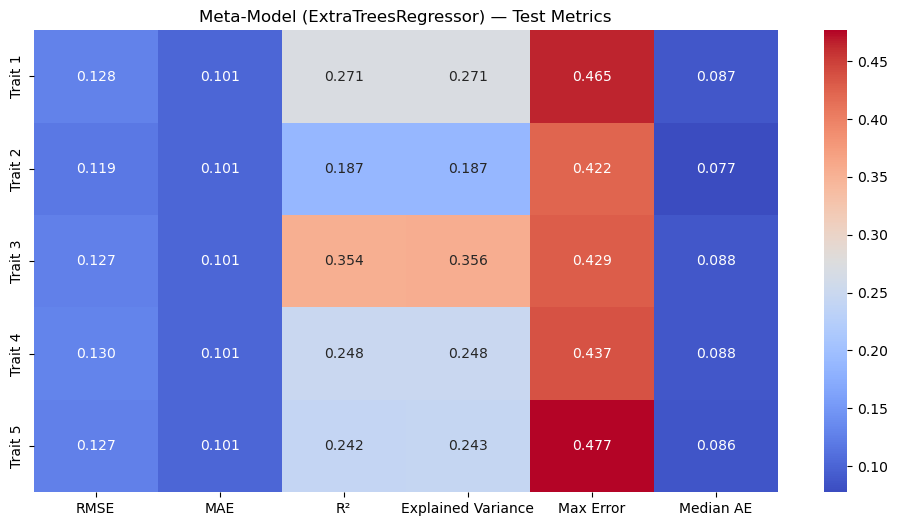

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, max_error, median_absolute_error
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# === Step 1: Define Meta-Learner ===
meta_model = ExtraTreesRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# === Step 2: Train Meta-Learner on stacked train ===
meta_model.fit(stacked_train, y_train)

# === Step 3: Predict on validation and test sets ===
val_meta_preds = meta_model.predict(stacked_val)
test_meta_preds = meta_model.predict(stacked_test)

# === Step 4: Evaluation Function ===
def evaluate_predictions(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred, multioutput='raw_values'))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred, multioutput='raw_values')
    expl_var = explained_variance_score(y_true, y_pred, multioutput='raw_values')
    max_err = [max_error(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]
    med_ae = [median_absolute_error(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]

    metrics_dict = {
        "RMSE": rmse,
        "MAE": [mae] * len(rmse),
        "R²": r2,
        "Explained Variance": expl_var,
        "Max Error": max_err,
        "Median AE": med_ae,
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[f"Trait {i+1}" for i in range(len(rmse))])
    averages = {k: np.mean(v) if isinstance(v, (list, np.ndarray)) else v for k, v in metrics_dict.items()}
    metrics_df.loc["Average"] = averages

    print(f"\n=== Deep Super Learner Meta-Model Metrics ({label}) ===")
    print(metrics_df)

    plt.figure(figsize=(12, 6))
    sns.heatmap(metrics_df.iloc[:-1].astype(float), annot=True, fmt=".3f", cmap="coolwarm")
    plt.title(f"Meta-Model (ExtraTreesRegressor) — {label} Metrics")
    plt.show()

# === Step 5: Evaluate on both validation and test sets ===
evaluate_predictions(y_val, val_meta_preds, "Validation")
evaluate_predictions(y_test, test_meta_preds, "Test")


In [11]:
import joblib

# Save the meta-model
joblib.dump(meta_model, "deep_super_learner_meta_model.pkl")
print("Meta-model saved successfully.")


Meta-model saved successfully.
